# Manejar Archivos de Excel con Python

## 1. Podemos trabjar archvios de excel con Python mediante la librería Pandas https://pandas.pydata.org

In [ ]:
! pip install pandas

In [ ]:
! pip install openpyxl

## 2. Pandas nos permite operar los archivos de Excel como *DataFrames* usando `read_excel`

In [15]:
import pandas

data_municipios = pandas.read_excel("catalogs.xlsx", sheet_name="Catálogo MUNICIPIOS", engine='openpyxl')

data_municipios.sample(5)

,CLAVE_MUNICIPIO,MUNICIPIO,CLAVE_ENTIDAD
841,41,IRIMBO,16
1373,350,SAN SEBASTIÁN TUTLA,20
893,93,TLALPUJAHUA,16
1852,9,CERRO DE SAN PEDRO,24
2139,22,ATZACAN,30


## 3. Cada hoja en el libro de excel será un *DataFrame*

In [16]:
data_entidades = pandas.read_excel("catalogs.xlsx", sheet_name="Catálogo de ENTIDADES", engine='openpyxl')

data_entidades.sample(5)

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA
26,27,TABASCO,TC
34,98,SE IGNORA,SI
13,14,JALISCO,JC
12,13,HIDALGO,HG
9,10,DURANGO,DG


## 4. Podemos combinar la información de dos *DataFrames*, mediante el nombre de la columna del *DataFrame* izquierdo que equivalga en valor a la columna del *DataFrame* derecho usando `join`

In [24]:
data_municipios_entidades = data_municipios.join(data_entidades.set_index("CLAVE_ENTIDAD"), on='CLAVE_ENTIDAD')

data_municipios_entidades.sample(5)

,CLAVE_MUNICIPIO,MUNICIPIO,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA
1568,545,TEOTITLÁN DE FLORES MAGÓN,20,OAXACA,OC
1512,489,SANTIAGO TETEPEC,20,OAXACA,OC
541,78,XOCHIATIPAN,13,HIDALGO,HG
352,18,JARAL DEL PROGRESO,11,GUANAJUATO,GT
1488,465,SANTIAGO IXCUINTEPEC,20,OAXACA,OC


## 5. Podemos filtrar datos de interés usando `query`

In [26]:
data_oaxaca = data_municipios_entidades.query("ENTIDAD_FEDERATIVA == 'OAXACA'")

data_oaxaca.sample(5)

,CLAVE_MUNICIPIO,MUNICIPIO,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA
1374,351,SAN SIMÓN ALMOLONGAS,20,OAXACA,OC
1382,359,SANTA ANA YARENI,20,OAXACA,OC
1392,369,SANTA CATARINA QUIANÉ,20,OAXACA,OC
1293,270,SAN MIGUEL HUAUTLA,20,OAXACA,OC
1526,503,SANTIAGO ZOOCHILA,20,OAXACA,OC


## 6. Podemos obtener los valores de una columna indicando su nombre

In [27]:
municipios_oaxaca = data_oaxaca["MUNICIPIO"]

municipios_oaxaca

1024                     ABEJONES
1025    ACATLÁN DE PÉREZ FIGUEROA
1026         ASUNCIÓN CACALOTEPEC
1027          ASUNCIÓN CUYOTEPEJI
1028          ASUNCIÓN IXTALTEPEC
                  ...            
1590           ZAPOTITLÁN LAGUNAS
1591            ZAPOTITLÁN PALMAS
1592       SANTA INÉS DE ZARAGOZA
1593          ZIMATLÁN DE ÁLVAREZ
1594              NO ESPECIFICADO
Name: MUNICIPIO, Length: 571, dtype: object

## 7. Podemos obtener el conjunto de valores diferentes de una columna, por ejemplo, las distintas entidades

In [28]:
entidades = set(data_municipios_entidades["ENTIDAD_FEDERATIVA"])

entidades

{'AGUASCALIENTES',
 'BAJA CALIFORNIA',
 'BAJA CALIFORNIA SUR',
 'CAMPECHE',
 'CHIAPAS',
 'CHIHUAHUA',
 'CIUDAD DE MÉXICO',
 'COAHUILA DE ZARAGOZA',
 'COLIMA',
 'DURANGO',
 'ESTADOS UNIDOS MEXICANOS',
 'GUANAJUATO',
 'GUERRERO',
 'HIDALGO',
 'JALISCO',
 'MICHOACÁN DE OCAMPO',
 'MORELOS',
 'MÉXICO',
 'NAYARIT',
 'NO APLICA',
 'NO ESPECIFICADO',
 'NUEVO LEÓN',
 'OAXACA',
 'PUEBLA',
 'QUERÉTARO',
 'QUINTANA ROO',
 'SAN LUIS POTOSÍ',
 'SE IGNORA',
 'SINALOA',
 'SONORA',
 'TABASCO',
 'TAMAULIPAS',
 'TLAXCALA',
 'VERACRUZ DE IGNACIO DE LA LLAVE',
 'YUCATÁN',
 'ZACATECAS'}

## 8. Podemos contar cuántos municipios hay por cada entidad

In [45]:
municipios = []

for entidad in entidades:
    total_municipios = len(data_municipios_entidades.query("ENTIDAD_FEDERATIVA == '{}'".format(entidad)))
    municipios.append(total_municipios)
    
data_municipios_por_entidad = pandas.DataFrame(zip(entidades, municipios), columns=["ENTIDAD_FEDERATIVA", "TOTAL_MUNICIPIOS"])

data_municipios_por_entidad.sample(5)

,ENTIDAD_FEDERATIVA,TOTAL_MUNICIPIOS
33,SONORA,73
14,ZACATECAS,59
24,MICHOACÁN DE OCAMPO,114
3,SAN LUIS POTOSÍ,59
12,HIDALGO,85


## 9. Podemos graficas dos columnas de un *DataFrame* usando `matplotlib`

In [ ]:
! pip install matplotlib

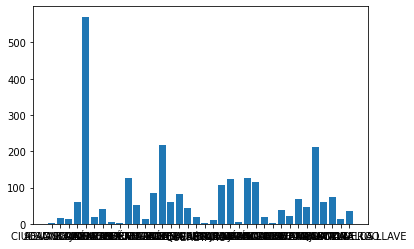

In [50]:
import matplotlib.pyplot as plt

plt.bar(data_municipios_por_entidad["ENTIDAD_FEDERATIVA"], data_municipios_por_entidad["TOTAL_MUNICIPIOS"])
plt.show()

## 10. Podemos reducir los elementos a graficas y ajustar las leyendas de los ejes

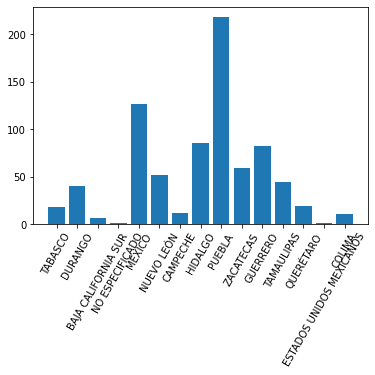

In [58]:
import matplotlib.pyplot as plt

plt.bar(data_municipios_por_entidad["ENTIDAD_FEDERATIVA"][5:20], data_municipios_por_entidad["TOTAL_MUNICIPIOS"][5:20])
plt.xticks(rotation=60)
plt.show()